In [1]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
H_s, H_jw, mod_H_jw, phi, s, t, vi, vo, va, r1, r2, r3, c1, c2, Hs, w, vt = symbols("H_s H_jw |H_jw| phi s t vi vo va r1 r2 r3 c1 c2 Hs w vt")

eq1 = Eq((va-vi)/r1 + ((va-vo)/r2) + (va/(1/(s*c1))) + ((va)/r3), 0)
eq1

Eq(c1*s*va + va/r3 + (va - vo)/r2 + (va - vi)/r1, 0)

In [3]:
eq2 = Eq(va,-r3*(vo/(1/(s*c2))))
eq2.simplify()

Eq(va, -c2*r3*s*vo)

In [4]:
sol = linsolve([eq1, eq2], (vo,va))
sol

{(-r2*vi/(c1*c2*r1*r2*r3*s**2 + c2*r1*r2*s + c2*r1*r3*s + c2*r2*r3*s + r1), c2*r2*r3*s*vi/(c1*c2*r1*r2*r3*s**2 + c2*r1*r2*s + c2*r1*r3*s + c2*r2*r3*s + r1))}

In [5]:
Vo = sol.args[0][0]

Hs = Vo/vi 
Eq(H_s, Hs)

Eq(H_s, -r2/(c1*c2*r1*r2*r3*s**2 + c2*r1*r2*s + c2*r1*r3*s + c2*r2*r3*s + r1))

In [6]:
Hs_subs = Hs.subs({c1:100e-9, c2: 10e-9, r1:470e3, r2:470e3,r3:47e3})
Eq(H_s, Hs_subs).simplify()

Eq(H_s, -470000.0/(10.3823*s**2 + 2650.8*s + 470000.0))

In [7]:
# Substituindo s = jw

Hjw = Hs.subs(s, I*w)
Eq(H_jw,Hjw)

Eq(H_jw, -r2/(-c1*c2*r1*r2*r3*w**2 + I*c2*r1*r2*w + I*c2*r1*r3*w + I*c2*r2*r3*w + r1))

In [8]:
#Calculando Modulo
mod_Hjw = Eq(mod_H_jw,abs(Hjw))
mod_Hjw_subs = mod_Hjw.subs({c1:100e-9, c2: 10e-9, r1:470e3, r2:470e3,r3:47e3})
mod_Hjw_subs


Eq(|H_jw|, 470000.0/Abs(-10.3823*w**2 + 2650.8*I*w + 470000.0))

In [9]:
Hjw_subs = Hjw.subs({c1:100e-9, c2: 10e-9, r1:470e3, r2:470e3,r3:47e3})
Hjw_denom = denom(Hjw_subs)
Hjw_polos = solve(Hjw_denom, w)
Hjw_polos
Eq(H_jw,Hjw_subs).simplify()

Eq(H_jw, -470000.0/(-10.3823*w**2 + 2650.8*I*w + 470000.0))

In [10]:
Hjw_polos

[-170.212765957447 + 127.659574468085*I, 170.212765957447 + 127.659574468085*I]

In [11]:
#resposta em radiano, se liga
Fase = Eq(phi,deg(arg(Hjw_subs)))
Fase

Eq(phi, 180*arg(-1/(-10.3823*w**2 + 2650.8*I*w + 470000.0))/pi)

In [12]:
#freq 40Hz
Mod1=abs(Hjw_subs)
Arg1=deg(arg(Hjw_subs))
float(Mod1.subs(w,2*pi*40)), float(Arg1.subs(w,2*pi*40))

(0.6795413111574066, 74.41665699680756)

In [13]:
# calcular o módulo e o argumento em cada frequência

def calcular_respostas(frequencias, Yo, Uo, cursor_diff_2_1):
    resultados = []
    for i, freq in enumerate(frequencias):  # Usando enumerate para indexar corretamente
        omega = 2 * pi * freq
        Mod = abs(Hjw_subs)
        Arg = deg(arg(Hjw_subs))
        Mod_value = float(Mod.subs(w, omega))
        Arg_value = float(Arg.subs(w, omega))
        Periodo = 1 / freq
        Mod_Hjw = Yo[i] / Uo[i] 
        Phase = 360*cursor_diff_2_1[i]/Periodo

        resultados.append({
            'Frequência (Hz)': freq,
            'Módulo_Python': Mod_value,
            'Argumento_Python (Deg)': Arg_value,
            'Período (s)': Periodo,
            'Yo': Yo[i],
            'Uo': Uo[i],
            '|H(jω)| LTSpice': abs(Mod_Hjw),
            "Fase LTSpice (Deg)": Phase
        })

    return resultados

# Lista de frequencias em Hz
# frequencias = [0.01, 0.1, 1, 10, 100, 1000]
frequencias = np.logspace(-2, 5, num=100)
Yo = np.logspace(-2, 5, num=100)
Uo = np.logspace(-2, 5, num=100)
cursor_diff_2_1 = np.logspace(-2, 5, num=100)

resultados = calcular_respostas(frequencias, Yo, Uo, cursor_diff_2_1)
df = pd.DataFrame(resultados)
df

,Frequência (Hz),Módulo_Python,Argumento_Python (Deg),Período (s),Yo,Uo,|H(jω)| LTSpice,Fase LTSpice (Deg)
0,0.010000,1.000000e+00,179.979696,100.000000,0.010000,0.010000,1.0,3.600000e-02
1,0.011768,1.000000e+00,179.976106,84.975344,0.011768,0.011768,1.0,4.985591e-02
2,0.013849,1.000000e+00,179.971881,72.208090,0.013849,0.013849,1.0,6.904477e-02
3,0.016298,1.000000e+00,179.966910,61.359073,0.016298,0.016298,1.0,9.561916e-02
4,0.019179,1.000000e+00,179.961059,52.140083,0.019179,0.019179,1.0,1.324217e-01
...,...,...,...,...,...,...,...,...
95,52140.082880,4.217947e-07,0.044653,0.000019,52140.082880,52140.082880,1.0,9.786918e+11
96,61359.072734,3.045699e-07,0.037944,0.000016,61359.072734,61359.072734,1.0,1.355377e+12
97,72208.090184,2.199241e-07,0.032243,0.000014,72208.090184,72208.090184,1.0,1.877043e+12
98,84975.343591,1.588030e-07,0.027399,0.000012,84975.343591,84975.343591,1.0,2.599491e+12


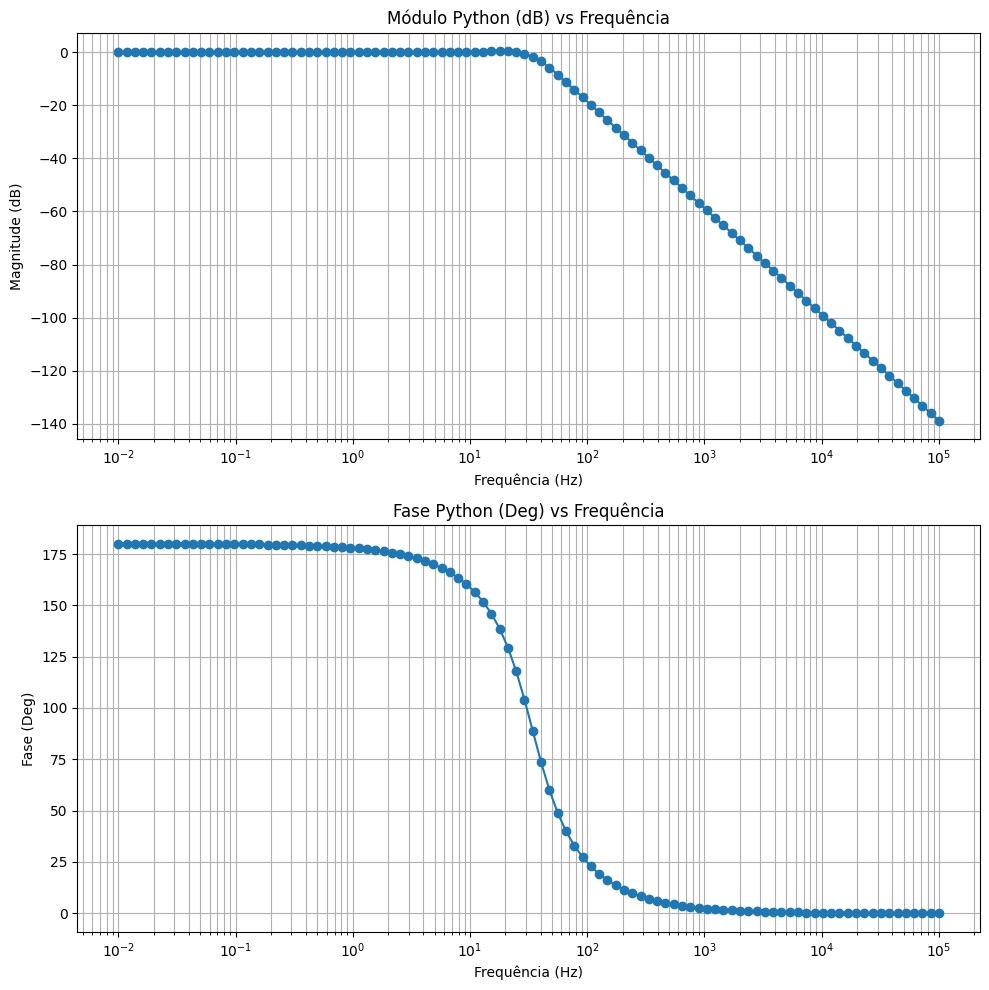

In [14]:
# Convertendo módulo para dB 
df['Módulo_Python'] = 20 * np.log10(df['Módulo_Python'])

# Plotando o diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Módulo em dB
axs[0].semilogx(df['Frequência (Hz)'], df['Módulo_Python'], marker='o', linestyle='-')
axs[0].set_title('Módulo Python (dB) vs Frequência')
axs[0].set_xlabel('Frequência (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].grid(True, which="both", ls="-")

# Fase em graus
axs[1].semilogx(df['Frequência (Hz)'], df['Argumento_Python (Deg)'], marker='o', linestyle='-')
axs[1].set_title('Fase Python (Deg) vs Frequência')
axs[1].set_xlabel('Frequência (Hz)')
axs[1].set_ylabel('Fase (Deg)')
axs[1].grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()

In [15]:
arrayAbsHj2pif = df['Módulo_Python']
np.argmax(arrayAbsHj2pif)

46

In [16]:
Hs_sub_deg = Hs_subs*5*(1/s)

Hs_sub_deg

-2350000.0/(s*(10.3823*s**2 + 2650.8*s + 470000.0))

In [17]:
#Transformada inversa de Laplace
vt = inverse_laplace_transform(Hs_sub_deg, s, t)
vt

-2350000.0*(-1.59574468085106e-6*exp(-127.659574468085*t)*sin(170.212765957447*t) - 2.12765957446809e-6*exp(-127.659574468085*t)*cos(170.212765957447*t))*Heaviside(t) - 5.0*Heaviside(t)

In [18]:
Eq(H_s, Hs_subs)

Eq(H_s, -470000.0/(10.3823*s**2 + 2650.8*s + 470000.0))

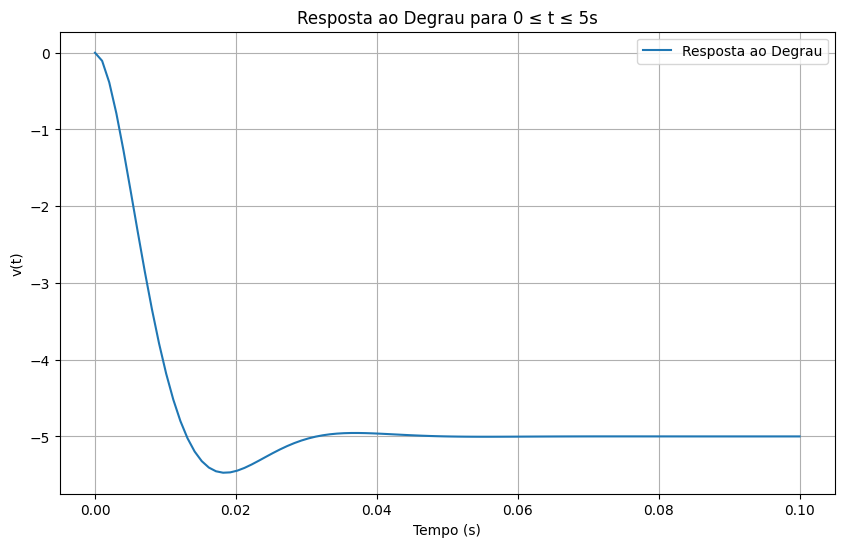

In [19]:
# Realizando a transformação inversa de Laplace
vt = inverse_laplace_transform(Hs_sub_deg, s, t)

# Convertendo a expressão simbólica para uma função numérica
v_t_func = lambdify(t, vt, 'numpy')

# Definindo o vetor de tempo de 0 a 5 segundos
t_vals = np.linspace(0, 0.1, 100)
v_t_vals = v_t_func(t_vals)

# Plotando a resposta ao degrau
plt.figure(figsize=(10, 6))
plt.plot(t_vals, v_t_vals, label='Resposta ao Degrau')
plt.title('Resposta ao Degrau para 0 ≤ t ≤ 5s')
plt.xlabel('Tempo (s)')
plt.ylabel('v(t)')
plt.grid(True)
plt.legend()
plt.show()


In [20]:

# Determinando o valor de regime permanente
lam_Vo_t = lambdify(t, vt)
t_vals= np.linspace(0,0.5, 1000)
Vo_vals= lam_Vo_t(t_vals)


In [21]:
valor_regime_permanente = vt.subs(t,2)
valor_regime_permanente

-5.00000000000000

In [22]:
t_10 = t_vals[np.where(np.isclose(-5*0.1, Vo_vals, atol=1e-1))]
t_90 = t_vals[np.where(np.isclose(-5*0.9, Vo_vals, atol=1e-1))]

t_10,t_90

(array([0.0025025]), array([0.01101101]))

In [23]:
#Transformada inversa de Laplace
vt = inverse_laplace_transform(Hs_sub_deg, s, t)
vt

-2350000.0*(-1.59574468085106e-6*exp(-127.659574468085*t)*sin(170.212765957447*t) - 2.12765957446809e-6*exp(-127.659574468085*t)*cos(170.212765957447*t))*Heaviside(t) - 5.0*Heaviside(t)

In [24]:
vt_10 = vt.subs(t,0.0025025)
vt_90 = vt.subs(t,0.01101101)

vt_10, vt_90

(-0.566179061974448, -4.48880082565333)

In [25]:
t_99 = t_vals[np.where(np.isclose(-5*0.99, Vo_vals, atol=1e-1))]
t_101 = t_vals[np.where(np.isclose(-5*1.1, Vo_vals, atol=1e-1))]

t_99,t_101

(array([0.01251251, 0.01301301, 0.02952953, 0.03003003, 0.03053053,
        0.03103103, 0.03153153, 0.03203203, 0.03253253, 0.03303303,
        0.03353353, 0.03403403, 0.03453453, 0.03503504, 0.03553554,
        0.03603604, 0.03653654, 0.03703704, 0.03753754, 0.03803804,
        0.03853854, 0.03903904, 0.03953954, 0.04004004, 0.04054054,
        0.04104104, 0.04154154, 0.04204204, 0.04254254, 0.04304304,
        0.04354354, 0.04404404, 0.04454454, 0.04504505, 0.04554555,
        0.04604605, 0.04654655, 0.04704705, 0.04754755, 0.04804805,
        0.04854855, 0.04904905, 0.04954955, 0.05005005, 0.05055055,
        0.05105105, 0.05155155, 0.05205205, 0.05255255, 0.05305305,
        0.05355355, 0.05405405, 0.05455455, 0.05505506, 0.05555556,
        0.05605606, 0.05655656, 0.05705706, 0.05755756, 0.05805806,
        0.05855856, 0.05905906, 0.05955956, 0.06006006, 0.06056056,
        0.06106106, 0.06156156, 0.06206206, 0.06256256, 0.06306306,
        0.06356356, 0.06406406, 0.06456456, 0.06